## 1. Import Libraries & Setup

In [25]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## 2. Dataset & Parameters

In [26]:
# Basic Settings
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 8
EPOCHS = 15
DATASET_PATH = "Soil types/"
MODEL_PATH = "soil_classifier_model.h5"


## 3. Data Augmentation & Preprocessing

In [27]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


## 4. Train & Validation Generators

In [28]:
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())
print("📌 Classes:", class_names)


Found 126 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
📌 Classes: ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']


## 5. Visualize Sample Images

C:\Users\Swayam Agarwal\AppData\Local\Temp\ipykernel_25404\1388660212.py:8: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Swayam Agarwal\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


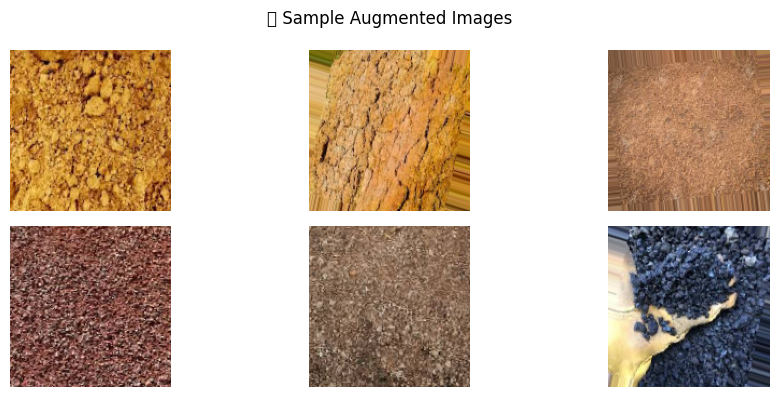

In [29]:
images, _ = next(train_generator)
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle("📸 Sample Augmented Images")
plt.tight_layout()
plt.show()


## 6. Build the CNN Model

In [30]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')
])


## 7. Compile & Train the Model

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Epoch 1/15
16/16 [==============================] - 1s 55ms/step - loss: 1.4860 - accuracy: 0.3254 - val_loss: 1.0482 - val_accuracy: 0.3667
Epoch 2/15
16/16 [==============================] - 1s 36ms/step - loss: 1.1462 - accuracy: 0.4206 - val_loss: 1.0727 - val_accuracy: 0.3667
Epoch 3/15
16/16 [==============================] - 1s 36ms/step - loss: 1.0019 - accuracy: 0.5317 - val_loss: 0.8631 - val_accuracy: 0.4667
Epoch 4/15
16/16 [==============================] - 1s 36ms/step - loss: 0.9701 - accuracy: 0.5873 - val_loss: 1.0989 - val_accuracy: 0.5333
Epoch 5/15
16/16 [==============================] - 1s 37ms/step - loss: 1.0178 - accuracy: 0.5556 - val_loss: 0.7972 - val_accuracy: 0.5667
Epoch 6/15
16/16 [==============================] - 1s 36ms/step - loss: 1.1271 - accuracy: 0.5000 - val_loss: 0.9000 - val_accuracy: 0.6000
Epoch 7/15
16/16 [==============================] - 1s 38ms/step - loss: 0.7832 - accuracy: 0.6429 - val_loss: 0.5476 - val_accuracy: 0.6667
Epoch 8/15
16

## 8. Model Summary and Save Trained Model

In [32]:
model.summary()
model.save(MODEL_PATH)
print(f"✅ Model saved to: {MODEL_PATH}")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

## 9. Evaluate Model Performance

C:\Users\Swayam Agarwal\AppData\Local\Temp\ipykernel_25404\173419163.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Swayam Agarwal\AppData\Local\Temp\ipykernel_25404\173419163.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Swayam Agarwal\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Swayam Agarwal\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


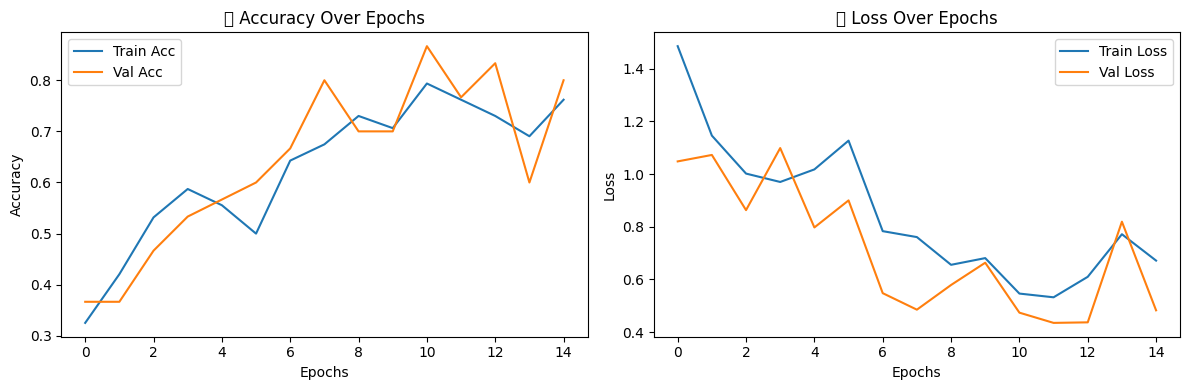

4/4 [==============================] - 0s 25ms/step

📊 Classification Report:
               precision    recall  f1-score   support

   Black Soil       0.29      0.29      0.29         7
  Cinder Soil       0.29      0.33      0.31         6
Laterite Soil       0.25      0.33      0.29         6
    Peat Soil       0.00      0.00      0.00         6
  Yellow Soil       0.00      0.00      0.00         5

     accuracy                           0.20        30
    macro avg       0.16      0.19      0.18        30
 weighted avg       0.17      0.20      0.19        30

🧾 Confusion Matrix:
[[2 1 1 3 0]
 [2 2 0 1 1]
 [1 1 2 1 1]
 [1 2 2 0 1]
 [1 1 3 0 0]]
4/4 [==============================] - 0s 26ms/step - loss: 0.4356 - accuracy: 0.8000

📋 Overall Validation Accuracy: 80.00%


In [33]:
# Accuracy & Loss Plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('📈 Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Classification Report
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"\n📋 Overall Validation Accuracy: {val_acc * 100:.2f}%")


## 10. Crop Recommendation Mapping

In [34]:
soil = {
    "Black Soil": "🌾 Suitable crops: Cotton, Soybean, Sorghum, Maize, Sunflower, Millets, Pulses",
    "Cinder Soil": "🌾 Suitable crops: Millets, Oilseeds, Pulses (used in hilly/volcanic areas with proper irrigation)",
    "Laterite Soil": "🌾 Suitable crops: Tea, Coffee, Cashew, Coconut, Tapioca, Pineapple",
    "Peat Soil": "🌾 Suitable crops: Rice (Paddy), Potatoes, Sugar Beet, Vegetables",
    "Yellow Soil": "🌾 Suitable crops: Groundnut, Maize, Cotton, Pulses, Oilseeds"
}


## 11. Predict Soil Type from Image

In [35]:
def predict_soil_type_from_image(image_path):
    try:
        if not os.path.exists(MODEL_PATH):
            print("❌ Saved model not found!")
            return
        loaded_model = load_model(MODEL_PATH)

        img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = loaded_model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        raw_label = class_names[predicted_class_index]
        formatted_label = raw_label.replace('_', ' ').strip().title()

        # Check if the image is from soil mapping
        is_soil_mapping = False
        for soil_type in soil.keys():
            if soil_type.lower() in formatted_label.lower():
                is_soil_mapping = True
                break

        if not is_soil_mapping:
            print("⚠️ Warning: This image does not appear to be from soil mapping. Please upload an image of soil.")
            return

        plt.figure()
        plt.imshow(load_img(image_path))
        plt.axis('off')
        plt.title(f"📢 Predicted: {formatted_label}")
        plt.show()

        print(f"📢 Predicted: {formatted_label}")

        matched_soil = next((key for key in soil if key.lower() == formatted_label.lower()), None)
        if matched_soil:
            print(f"🌾 {soil[matched_soil]}")
        else:
            print("⚠️ No crop data available for this soil type.")
    except Exception as e:
        print(f"❌ Error: {e}")

## 12. Manual & Random Prediction

1/1 [==============================] - 0s 53ms/step


C:\Users\Swayam Agarwal\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128226 (\N{PUBLIC ADDRESS LOUDSPEAKER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


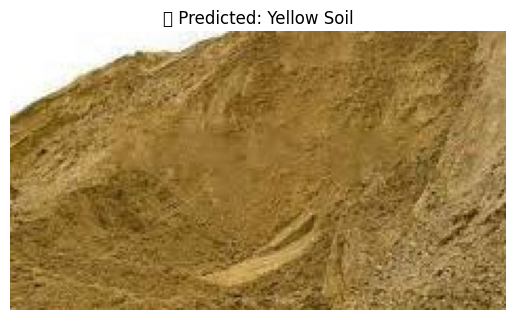

📢 Predicted: Yellow Soil
🌾 🌾 Suitable crops: Groundnut, Maize, Cotton, Pulses, Oilseeds

🔍 Testing Random Image from Dataset...
1/1 [==============================] - 0s 75ms/step


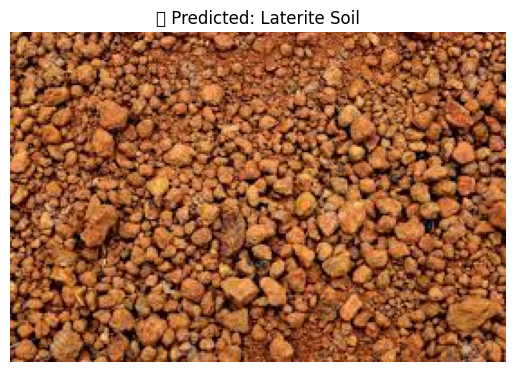

📢 Predicted: Laterite Soil
🌾 🌾 Suitable crops: Tea, Coffee, Cashew, Coconut, Tapioca, Pineapple


In [36]:
def manual_predict():
    path = input("📂 Enter the path of the soil image: ").strip()
    if os.path.exists(path):
        predict_soil_type_from_image(path)
    else:
        print("❌ The file path you entered doesn't exist.")

def predict_random_image():
    print("\n🔍 Testing Random Image from Dataset...")
    random_class = random.choice(class_names)
    class_path = os.path.join(DATASET_PATH, random_class)
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    predict_soil_type_from_image(image_path)

# 🔽 CALL FUNCTIONS
manual_predict()
predict_random_image()
